# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

620

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#Performing API calls

# base_url = "http://api.openweathermap.org/data/2.5/weather?"
base_url= "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

count = 1
sets = 1


weather_df = pd.DataFrame({"City": cities})
weather_df["Cloudiness"] = ""
weather_df["Country"] = ""
weather_df["Date"] = ""
weather_df["Humidity"] = ""
weather_df["Lat"] = ""
weather_df["Lon"] = ""
weather_df["Max Temp"] = ""
weather_df["Wind Speed"] = ""



print("Beginning Data Retrieval")
print("-----------------------------")
for index, row in weather_df.iterrows():
    city =row["City"]
    query_url = base_url + "&q=" +city
    response=requests.get(query_url).json()
    try:
        print(f"Processing Record {count}  of Set {sets} | {city}.")
        weather_df.loc[index,"Cloudiness"] = response["clouds"]["all"]
        weather_df.loc[index,"Country"] = response["sys"]["country"]
        weather_df.loc[index,"Date"] = response["dt"]
        weather_df.loc[index, "Humidity"] = response["main"]["humidity"]
        weather_df.loc[index, "Lat"] = response["coord"]["lat"]
        weather_df.loc[index, "Lon"] = response["coord"]["lon"]
        weather_df.loc[index, "Max Temp"] = response["main"]["temp_max"]
        weather_df.loc[index, "Wind Speed"] = response["wind"]["speed"]
    except:
        print("City not found...skipping.")
        
        weather_df.loc[index, "Cloudiness"]=""
        weather_df.loc[index, "Country"]=""
        weather_df.loc[index,"Date"]=""
        weather_df.loc[index, "Humidity"]=""
        weather_df.loc[index, "Lat"]=""
        weather_df.loc[index, "Lon"] = ""
        weather_df.loc[index, "Max Temp"]=""
        weather_df.loc[index, "Wind Speed"]=""
    if count == 50:
     count = 0
     sets = sets + 1

     
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1  of Set 1 | atuona.
Processing Record 1  of Set 1 | panguna.
Processing Record 1  of Set 1 | bluff.
Processing Record 1  of Set 1 | mar del plata.
Processing Record 1  of Set 1 | kahului.
Processing Record 1  of Set 1 | karasjok.
Processing Record 1  of Set 1 | albany.
Processing Record 1  of Set 1 | machachi.
Processing Record 1  of Set 1 | lebu.
Processing Record 1  of Set 1 | kloulklubed.
Processing Record 1  of Set 1 | toliary.
City not found...skipping.
Processing Record 1  of Set 1 | ilulissat.
Processing Record 1  of Set 1 | rikitea.
Processing Record 1  of Set 1 | amapa.
Processing Record 1  of Set 1 | esfahan.
Processing Record 1  of Set 1 | vaini.
Processing Record 1  of Set 1 | torbay.
Processing Record 1  of Set 1 | puerto narino.
Processing Record 1  of Set 1 | port macquarie.
Processing Record 1  of Set 1 | palabuhanratu.
City not found...skipping.
Processing Record 1  of Set 1 | mayskiy.
Processin

Processing Record 1  of Set 1 | narsaq.
Processing Record 1  of Set 1 | porto empedocle.
Processing Record 1  of Set 1 | longyearbyen.
Processing Record 1  of Set 1 | adrar.
Processing Record 1  of Set 1 | agua branca.
Processing Record 1  of Set 1 | viedma.
Processing Record 1  of Set 1 | constantine.
Processing Record 1  of Set 1 | belushya guba.
City not found...skipping.
Processing Record 1  of Set 1 | safwah.
City not found...skipping.
Processing Record 1  of Set 1 | provideniya.
Processing Record 1  of Set 1 | axim.
Processing Record 1  of Set 1 | ancud.
Processing Record 1  of Set 1 | jaicos.
Processing Record 1  of Set 1 | mayna.
Processing Record 1  of Set 1 | akureyri.
Processing Record 1  of Set 1 | kamuli.
Processing Record 1  of Set 1 | amga.
Processing Record 1  of Set 1 | stamsund.
City not found...skipping.
Processing Record 1  of Set 1 | marienburg.
Processing Record 1  of Set 1 | souillac.
Processing Record 1  of Set 1 | osypenko.
Processing Record 1  of Set 1 | kenor

Processing Record 1  of Set 1 | odda.
Processing Record 1  of Set 1 | bulaevo.
Processing Record 1  of Set 1 | kimbe.
Processing Record 1  of Set 1 | vavoua.
Processing Record 1  of Set 1 | oktyabrskiy.
Processing Record 1  of Set 1 | mys shmidta.
City not found...skipping.
Processing Record 1  of Set 1 | russell.
Processing Record 1  of Set 1 | balkanabat.
Processing Record 1  of Set 1 | quatre cocos.
Processing Record 1  of Set 1 | kichera.
Processing Record 1  of Set 1 | waingapu.
Processing Record 1  of Set 1 | saint-joseph.
Processing Record 1  of Set 1 | sinarades.
Processing Record 1  of Set 1 | szomod.
Processing Record 1  of Set 1 | lashio.
Processing Record 1  of Set 1 | pitimbu.
Processing Record 1  of Set 1 | bandraboua.
Processing Record 1  of Set 1 | san patricio.
Processing Record 1  of Set 1 | dutse.
Processing Record 1  of Set 1 | yulara.
Processing Record 1  of Set 1 | klaksvik.
Processing Record 1  of Set 1 | roald.
Processing Record 1  of Set 1 | huancabamba.
Proces

Processing Record 1  of Set 1 | laguna de perlas.
Processing Record 1  of Set 1 | saint-augustin.
Processing Record 1  of Set 1 | huichapan.
Processing Record 1  of Set 1 | barabai.
Processing Record 1  of Set 1 | lagunillas.
Processing Record 1  of Set 1 | la libertad.
Processing Record 1  of Set 1 | college.
Processing Record 1  of Set 1 | koslan.
Processing Record 1  of Set 1 | buala.
Processing Record 1  of Set 1 | rio branco.
Processing Record 1  of Set 1 | lumeje.
Processing Record 1  of Set 1 | pingxiang.
Processing Record 1  of Set 1 | paradwip.
City not found...skipping.
Processing Record 1  of Set 1 | palmas.
Processing Record 1  of Set 1 | maceio.
Processing Record 1  of Set 1 | montepuez.
Processing Record 1  of Set 1 | querfurt.
Processing Record 1  of Set 1 | lasa.
Processing Record 1  of Set 1 | danjiangkou.
Processing Record 1  of Set 1 | vallenar.
Processing Record 1  of Set 1 | kutum.
Processing Record 1  of Set 1 | salinas.
Processing Record 1  of Set 1 | kitimat.
Pr

In [5]:
# Getting Counts
weather= pd.DataFrame(weather_df)
weather.count()


City          620
Cloudiness    620
Country       620
Date          620
Humidity      620
Lat           620
Lon           620
Max Temp      620
Wind Speed    620
dtype: int64

In [6]:
#Displaying Dataframe
weather= pd.DataFrame(weather_df)
weather.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lon,Max Temp,Wind Speed
0,atuona,50,PF,1570215124,72,-9.8,-139.03,80,18.81
1,panguna,52,PG,1570215124,80,-6.32,155.48,80,7.14
2,bluff,0,AU,1570214947,85,-23.58,149.07,54.8,2.98
3,mar del plata,32,AR,1570215125,21,-46.43,-67.52,61.28,19.35
4,kahului,20,US,1570215125,58,20.89,-156.47,82.4,13.87


In [7]:
weather.replace("", np.nan, inplace = True)
weather = weather_df.dropna()
weather.head()
print(f"There are {len(weather)} cities included in the weather analyses.")

There are 548 cities included in the weather analyses.


In [8]:
#Exporting city data into a csv file
weather.to_csv("weather_output.csv", index=False, encoding='utf-8')
weather.dropna()

,City,Cloudiness,Country,Date,Humidity,Lat,Lon,Max Temp,Wind Speed
0,atuona,50,PF,1570215124,72,-9.8,-139.03,80,18.81
1,panguna,52,PG,1570215124,80,-6.32,155.48,80,7.14
2,bluff,0,AU,1570214947,85,-23.58,149.07,54.8,2.98
3,mar del plata,32,AR,1570215125,21,-46.43,-67.52,61.28,19.35
4,kahului,20,US,1570215125,58,20.89,-156.47,82.4,13.87
5,karasjok,75,NO,1570215125,87,69.47,25.52,32,12.75
6,albany,75,US,1570215125,58,42.65,-73.75,55.99,12.75
7,machachi,75,EC,1570215125,45,-0.51,-78.57,73.4,14.99
8,lebu,75,ET,1570215125,87,8.96,38.73,59,9.17
9,kloulklubed,90,PW,1570215126,94,7.04,134.26,75.2,13.87


In [9]:
weather.dtypes
weather.convert_objects(convert_numeric=True).dtypes

C:\Users\atulu\Anaconda1\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


City           object
Cloudiness      int64
Country        object
Date            int64
Humidity        int64
Lat           float64
Lon           float64
Max Temp      float64
Wind Speed    float64
dtype: object

In [ ]:
# converting Raw Data to DataFrame


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

City          535
Cloudiness    535
Country       535
Date          535
Humidity      535
Lat           535
Lng           535
Max Temp      535
Wind Speed    535
dtype: int64

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,severo-kurilsk,92,RU,1534988024,93,50.68,156.12,54.27,2.73
1,darhan,8,MN,1534988024,71,49.49,105.92,72.81,8.55
2,tarakan,48,ID,1534988024,100,3.30,117.63,80.10,4.41
3,komsomolskiy,48,RU,1534987754,72,67.55,63.78,54.46,15.46
4,souillac,0,FR,1534986000,73,45.60,-0.60,71.60,3.36


Latitude vs temperature : As predicted, Temperature is warmer near equator. As latitude is farther from equator temperature is                            going down making it colder.

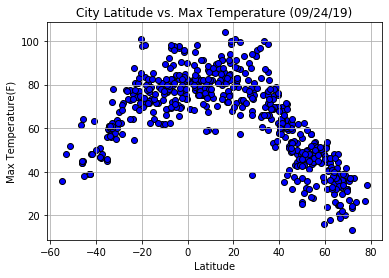

In [10]:
plt.scatter(weather["Lat"], weather["Max Temp"],edgecolors="black", c="blue")
plt.title("City Latitude vs. Max Temperature (09/24/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")
plt.grid (linestyle="-")
plt.savefig("City Latitude vs. Max Temperature.png")
plt.show()

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

latitude vs Humidity : Poor relationship seems to exist between latitude and humidity. It seems like humidity tends to increase                         with latitude.

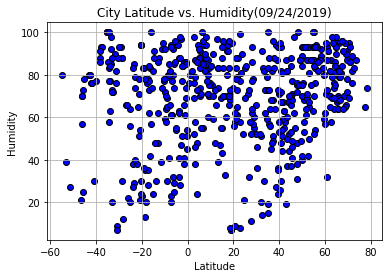

In [11]:
plt.scatter(weather["Lat"], weather["Humidity"],edgecolors="black", c="blue")
plt.title("City Latitude vs. Humidity(09/24/2019)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid (linestyle="-")
plt.savefig("City Latitude vs. Humidity.png")
plt.show()

#### Latitude vs. Humidity Plot

Latitude vs cloudiness: It does not seem to have strong realtionship between Latitude and cloudiness.

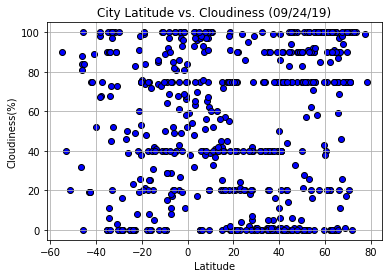

In [12]:
plt.scatter(weather["Lat"], weather["Cloudiness"],edgecolors="black", c="blue")
plt.title("City Latitude vs. Cloudiness (09/24/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.grid (linestyle="-")
plt.savefig("City Latitude vs. Cloudiness.png")
plt.show()

#### Latitude vs. Cloudiness Plot

Latitude vs Wind speed : Poor realtionship exist between Latitude and wind speed. However, wind speed seems to stay lower than                         15mph regardless of latitude.
                        

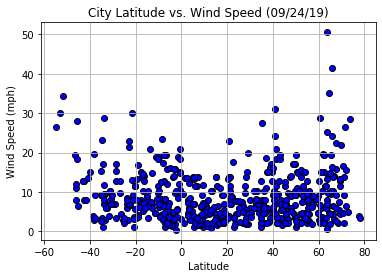

In [13]:
plt.scatter(weather["Lat"], weather["Wind Speed"],edgecolors="black", c="blue")
plt.title("City Latitude vs. Wind Speed (09/24/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid (linestyle="-")
plt.savefig("City Latitude vs. Wind Speed.png")
plt.show()

#### Latitude vs. Wind Speed Plot

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots


In [15]:
# Create Northern Hemisphere DataFrames
northern = weather.loc[(weather['Lat'] >= 0) & (weather['Lat'] <= 90)]
northern.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lon,Max Temp,Wind Speed
4,kahului,20,US,1570215125,58,20.89,-156.47,82.4,13.87
5,karasjok,75,NO,1570215125,87,69.47,25.52,32,12.75
6,albany,75,US,1570215125,58,42.65,-73.75,55.99,12.75
8,lebu,75,ET,1570215125,87,8.96,38.73,59,9.17
9,kloulklubed,90,PW,1570215126,94,7.04,134.26,75.2,13.87


In [16]:
northern.replace("", np.nan, inplace = True)
northern = weather.dropna()
northern.head()
print(f"There are {len(northern)} cities included in the weather analyses.")

There are 548 cities included in the weather analyses.


C:\Users\atulu\Anaconda1\lib\site-packages\pandas\core\frame.py:4042: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)


In [17]:
# Create Southern Hemisphere DataFrames
southern = weather.loc[(weather['Lat'] >= -90) & (weather['Lat'] <= 0)]
southern.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lon,Max Temp,Wind Speed
0,atuona,50,PF,1570215124,72,-9.8,-139.03,80,18.81
1,panguna,52,PG,1570215124,80,-6.32,155.48,80,7.14
2,bluff,0,AU,1570214947,85,-23.58,149.07,54.8,2.98
3,mar del plata,32,AR,1570215125,21,-46.43,-67.52,61.28,19.35
7,machachi,75,EC,1570215125,45,-0.51,-78.57,73.4,14.99


In [18]:
southern.replace("", np.nan, inplace = True)
southern = weather.dropna()
northern.head()
print(f"There are {len(southern)} cities included in the weather analyses.")

There are 548 cities included in the weather analyses.


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

r squared: -0.5192424282765694


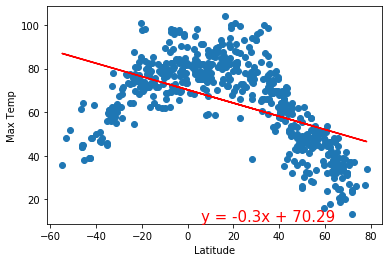

In [19]:
x_values = northern['Lat'].astype('float64')
y_values = northern['Max Temp'].astype('float64')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"r squared: {rvalue}")
plt.savefig("Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

r-squared: -0.5192424282765694


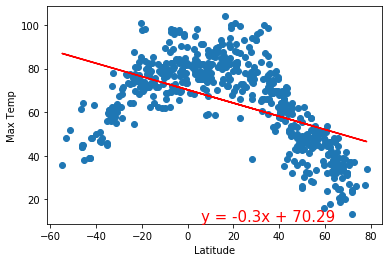

In [20]:
x_values = southern['Lat'].astype('float64')
y_values = southern['Max Temp'].astype('float64')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"r-squared: {rvalue}")
plt.savefig("Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r squared: 0.14536521964566537


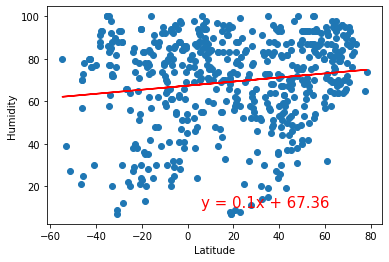

In [21]:
x_values = northern['Lat'].astype('float64')
y_values = northern['Humidity'].astype('float64')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"r squared: {rvalue}")
plt.savefig("Northern Hemisphere - Humidity vs Latitude Linear Regression.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r-squared: 0.14536521964566537


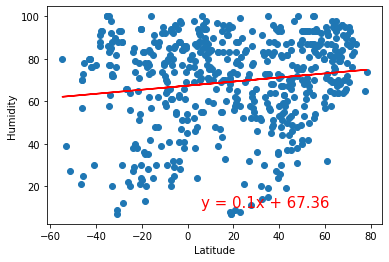

In [22]:
x_values = southern['Lat'].astype('float64')
y_values = southern['Humidity'].astype('float64')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"r-squared: {rvalue}")
plt.savefig("Southern Hemisphere - Humidity vs Latitude Linear Regression.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.08733547918934018


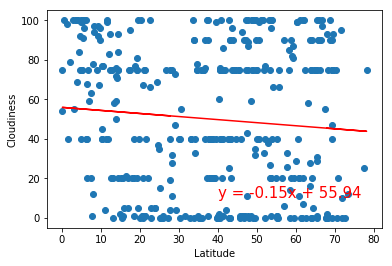

r-squared: 0.08392491248697209


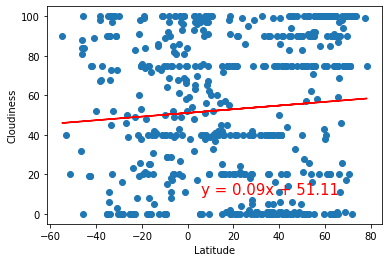

In [23]:
x_values = northern['Lat'].astype('float64')
y_values = northern['Cloudiness'].astype('float64')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"r-squared: {rvalue}")
plt.savefig("Northern Hemisphere - Cloudiness vs Latitude Linear Regression.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r-squared: 0.08392491248697209


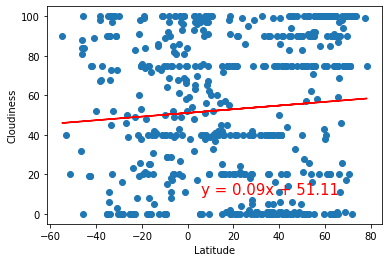

In [24]:
x_values = southern['Lat'].astype('float64')
y_values = southern['Cloudiness'].astype('float64')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"r-squared: {rvalue}")
plt.savefig("Southern Hemisphere - Cloudiness vs Latitude Linear Regression.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r-squared: -0.017416409722455988


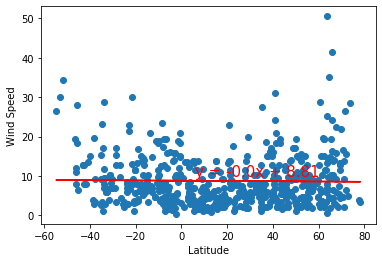

In [25]:
x_values = northern['Lat'].astype('float64')
y_values = northern['Wind Speed'].astype('float64')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"r-squared: {rvalue}")
plt.savefig("Northern Hemisphere - Wind Speed vs Latitude Linear Regression.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r-squared: -0.017416409722455988


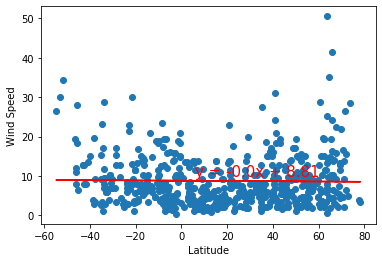

In [26]:
x_values = southern['Lat'].astype('float64')
y_values = southern['Wind Speed'].astype('float64')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"r-squared: {rvalue}")
plt.savefig("Southern Hemisphere - Wind Speed vs Latitude Linear Regression.png")
plt.show()